Date: 15/07/2022

Author: @kavindu404

In [ ]:
title: "Multi Class Classification From Scratch (Part 1)"
author: "Kavindu Piyumal"
date: "2022-07-15"
categories: [code, analysis]

: 

# Multi Class Classification From Scratch (Part 1)


In this mini blog series, I am implementing multiclass classifier for MNIST digits from scratch. In this part, I will be classifying the digits using pixel similarity. I will try to improve the performance in each part. First, let's import FastAI

In [1]:
from fastai.vision.all import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


MNIST dataset can be downloaded and extracted using untar_data() method. With FastAI, we can easily list the elements in the extracted derectory.

In [2]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

Let's first get training data into different objects. The ls() method returns an object of class L in FastAI.It has all the functionalities in python list() and some more.

In [3]:
zeros = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

In [152]:
zeros,ones,twos,threes,fours,fives,sixes,sevens,eights,nines

((#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/3/10011.png'

Now that we have all the data seperated into objects, let's stack them up.

In [4]:
stacked_zeros = torch.stack([tensor(Image.open(o)) for o in zeros]).float()/255
stacked_ones = torch.stack([tensor(Image.open(o)) for o in ones]).float()/255
stacked_twos = torch.stack([tensor(Image.open(o)) for o in twos]).float()/255
stacked_threes = torch.stack([tensor(Image.open(o)) for o in threes]).float()/255
stacked_fours = torch.stack([tensor(Image.open(o)) for o in fours]).float()/255
stacked_fives = torch.stack([tensor(Image.open(o)) for o in fives]).float()/255
stacked_sixes = torch.stack([tensor(Image.open(o)) for o in sixes]).float()/255
stacked_sevens = torch.stack([tensor(Image.open(o)) for o in sevens]).float()/255
stacked_eights = torch.stack([tensor(Image.open(o)) for o in eights]).float()/255
stacked_nines = torch.stack([tensor(Image.open(o)) for o in nines]).float()/255

In [5]:
stacked_zeros.shape, stacked_ones.shape, stacked_twos.shape, stacked_threes.shape, stacked_fours.shape, stacked_fives.shape, stacked_sixes.shape, stacked_sevens.shape, stacked_eights.shape, stacked_nines.shape, 

(torch.Size([5923, 28, 28]),
 torch.Size([6742, 28, 28]),
 torch.Size([5958, 28, 28]),
 torch.Size([6131, 28, 28]),
 torch.Size([5842, 28, 28]),
 torch.Size([5421, 28, 28]),
 torch.Size([5918, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([5851, 28, 28]),
 torch.Size([5949, 28, 28]))

In our first attempt, we will use pixel similarity. So, first, let's calculate the mean for each digit.

In [6]:
mean0 = stacked_zeros.mean(0)
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixes.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)

The mean for each digit represents the 'ideal' digit that is expected. Let's take a look at the 'ideal' 2.

In [11]:
df1 = pd.DataFrame(mean2[0:29,0:23])
df1.style.set_properties(**{'font-size':'4.5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000142,0.000142,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000184,0.000234,0.000400,0.000471,0.000259,0.000369,0.000718,0.000733,0.001320,0.000560,0.000047,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000030,0.000301,0.001010,0.002387,0.004827,0.007155,0.010033,0.012604,0.014091,0.015811,0.015780,0.012331,0.008118,0.004130,0.001792,0.000594,0.000146,0.000008
3,0.000000,0.000000,0.000007,0.000010,0.000056,0.001060,0.004104,0.010762,0.024223,0.045967,0.070977,0.100678,0.127955,0.151479,0.162052,0.160046,0.140632,0.108345,0.072146,0.043444,0.021461,0.008759,0.002672
4,0.000000,0.000000,0.000042,0.000090,0.000819,0.006367,0.017791,0.042089,0.083421,0.142241,0.211767,0.292313,0.370494,0.431761,0.461901,0.456149,0.417914,0.336929,0.243804,0.160297,0.089220,0.040629,0.012857
5,0.000000,0.000000,0.000077,0.000273,0.003049,0.016349,0.045503,0.096712,0.171761,0.263224,0.362981,0.463160,0.547239,0.610263,0.644565,0.647456,0.608250,0.530123,0.407579,0.281021,0.173409,0.088314,0.033626
6,0.000000,0.000000,0.000053,0.000680,0.006591,0.028900,0.076292,0.151805,0.242472,0.341647,0.436100,0.516924,0.570205,0.603516,0.622732,0.634839,0.627733,0.584579,0.494698,0.369531,0.244626,0.136664,0.056396
7,0.000000,0.000000,0.000254,0.000965,0.010361,0.040237,0.099327,0.176339,0.259723,0.339625,0.407273,0.454401,0.472272,0.475716,0.483725,0.502393,0.532844,0.546947,0.510726,0.415592,0.291848,0.174315,0.079336
8,0.000000,0.000045,0.000288,0.001272,0.011794,0.044498,0.102871,0.166226,0.228230,0.278922,0.319372,0.333384,0.328697,0.318813,0.326290,0.363595,0.431744,0.499352,0.508834,0.437793,0.316499,0.190417,0.088839
9,0.000000,0.000000,0.000267,0.001539,0.011091,0.039959,0.085990,0.129770,0.165140,0.192895,0.213386,0.212083,0.195751,0.186895,0.201606,0.266368,0.371373,0.475721,0.510332,0.450774,0.323187,0.191269,0.087439


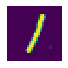

In [21]:
im = stacked_ones[1]
show_image(im)

Now, let's collect validation dataset and stack them up.

In [13]:
valid_zeros = (path/'testing'/'0').ls().sorted()
valid_ones = (path/'testing'/'1').ls().sorted()
valid_twos = (path/'testing'/'2').ls().sorted()
valid_threes = (path/'testing'/'3').ls().sorted()
valid_fours = (path/'testing'/'4').ls().sorted()
valid_fives = (path/'testing'/'5').ls().sorted()
valid_sixes = (path/'testing'/'6').ls().sorted()
valid_sevens = (path/'testing'/'7').ls().sorted()
valid_eights = (path/'testing'/'8').ls().sorted()
valid_nines = (path/'testing'/'9').ls().sorted()

In [14]:
valid_stacked_zeros = torch.stack([tensor(Image.open(o)) for o in valid_zeros]).float()/255
valid_stacked_ones = torch.stack([tensor(Image.open(o)) for o in valid_ones]).float()/255
valid_stacked_twos = torch.stack([tensor(Image.open(o)) for o in valid_twos]).float()/255
valid_stacked_threes = torch.stack([tensor(Image.open(o)) for o in valid_threes]).float()/255
valid_stacked_fours = torch.stack([tensor(Image.open(o)) for o in valid_fours]).float()/255
valid_stacked_fives = torch.stack([tensor(Image.open(o)) for o in valid_fives]).float()/255
valid_stacked_sixes = torch.stack([tensor(Image.open(o)) for o in valid_sixes]).float()/255
valid_stacked_sevens = torch.stack([tensor(Image.open(o)) for o in valid_sevens]).float()/255
valid_stacked_eights = torch.stack([tensor(Image.open(o)) for o in valid_eights]).float()/255
valid_stacked_nines = torch.stack([tensor(Image.open(o)) for o in valid_nines]).float()/255

In order to get the pixel similarity, we have to get the distance from the 'ideal' digit for each digit. First, we have to check the distance for each 'ideal' digit and then choose the closest one. In distance() method, we simply get the distance between two inputs. In min_distance() method, we find the closest 'ideal' digit for a given input. In is_correct() method, we can simply determine whether our prediction using pixel similarity is correct or not.

In [15]:
def distance(x,y): return (x-y).abs().mean((-1,-2))

In [16]:
mean_vec = [mean0, mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9]
def min_distance(x): 
    distances = [distance(x, o) for o in mean_vec]
    return distances.index(min(distances))

In [17]:
def is_correct(num, x): return num == min_distance(x)

Let's check with some inputs.

In [18]:
is_correct(4, valid_stacked_ones[140])

False

Now that we have guranteed it is working fine, let's calculate the accuracy of the model. In here, we will simply get the correct prediction per each class and then get the mean of it.

In [19]:
acc_zeros = tensor([is_correct(0,o) for o in valid_stacked_zeros]).float().mean()
acc_ones = tensor([is_correct(1,o) for o in valid_stacked_ones]).float().mean()
acc_twos = tensor([is_correct(2,o) for o in valid_stacked_twos]).float().mean()
acc_threes = tensor([is_correct(3,o) for o in valid_stacked_threes]).float().mean()
acc_fours = tensor([is_correct(4,o) for o in valid_stacked_fours]).float().mean()
acc_fives = tensor([is_correct(5,o) for o in valid_stacked_fives]).float().mean()
acc_sixes = tensor([is_correct(6,o) for o in valid_stacked_sixes]).float().mean()
acc_sevens = tensor([is_correct(7,o) for o in valid_stacked_sevens]).float().mean()
acc_eights = tensor([is_correct(8,o) for o in valid_stacked_eights]).float().mean()
acc_nines = tensor([is_correct(9,o) for o in valid_stacked_nines]).float().mean()

acc= tensor([acc_zeros, acc_ones, acc_twos, acc_threes, acc_fours, acc_fives, acc_sixes, acc_sevens, acc_eights, acc_nines]).mean()
acc

tensor(0.6610)

So, we have an accuracy of 66.1%. Given that we only considered pixel similarity, it is a good result. In next part, let's try to improve from here.